#Advanced ML - HW4 - Part 1

In [3]:
import gzip
import json
import pandas as pd

## Download Data

In [4]:
! pip install kaggle
! mkdir ~/.kaggle

In [11]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
!kaggle datasets download -d allen-institute-for-ai/CORD-19-research-challenge
!unzip -qq CORD-19-research-challenge.zip -d /content/CORD-19-research-challenge

100% 15.0G/15.0G [02:55<00:00, 90.2MB/s]
100% 15.0G/15.0G [02:55<00:00, 91.8MB/s]


In [13]:
root_path = '/content/CORD-19-research-challenge/'

In [14]:
metadata = pd.read_csv(root_path + '/metadata.csv')
metadata = metadata.dropna(subset=["pdf_json_files"])
metadata = metadata.sort_values(by=["publish_time"], ascending=False)
metadata = metadata.head(20000)
metadata.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
62968,4hcgisuk,2ecd2df3b19e54d13d8877422fca3328f0fc5256,PMC,COVID-19 Vaccine Priority for People With Neur...,10.14740/jnr665,PMC8279287,NaN,cc-by-nc,NaN,2024-04-20,"Pfeffer, Gerald; Jacob, Sarah; Preston, Jeffrey",J Neurol Res,NaN,NaN,NaN,document_parses/pdf_json/2ecd2df3b19e54d13d887...,document_parses/pmc_json/PMC8279287.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8...,NaN
1008055,t27rznoa,8c508df5a69d3128734bbb955cd50d5050d4c399,Elsevier; Medline; PMC,EatLOCAL: a platform that connects local farme...,10.1016/j.procs.2021.12.050,PMC8745938,35035623,els-covid,The COVID-19 pandemic has brought unprecedente...,2022-12-31,"Fortunato, Rafaela Bastos; Monteiro Zina, Ana ...",Procedia Computer Science,NaN,NaN,NaN,document_parses/pdf_json/8c508df5a69d3128734bb...,NaN,https://doi.org/10.1016/j.procs.2021.12.050; h...,245839078.0
749430,uc5efvto,979b3dcbb754e68837c98b4bc71b000570e0f681,Elsevier; Medline; PMC; WHO,The Impact of COVID-19 on China’s Capital Mark...,10.1016/j.procs.2022.01.011,PMC8812087,35136457.0,els-covid,This paper studied the impact of COVID-19 on C...,2022-12-31,"Xu, Weijia; Li, Aihua; Wei, Lu",Procedia Computer Science,NaN,NaN,NaN,document_parses/pdf_json/979b3dcbb754e68837c98...,NaN,https://api.elsevier.com/content/article/pii/S...,246488788.0
924659,nlpdcxrh,5a77e2ec7eba28d0905d416134cfa24bcab10f65,Elsevier; Medline; PMC,Unsupervised analysis of COVID-19 pandemic evo...,10.1016/j.procs.2021.12.061,PMC8745937,35035625.0,els-covid,Extracting information and discovering pattern...,2022-12-31,"Cassão, Victor; Alves, Domingos; de Andrade Mi...",Procedia Computer Science,NaN,NaN,NaN,document_parses/pdf_json/5a77e2ec7eba28d0905d4...,NaN,https://doi.org/10.1016/j.procs.2021.12.061; h...,245838392.0
960940,ct7nc16b,a2cf0e0738b69a0a1d73fb78d2a535af775fca91,Elsevier; PMC,An antifragile strategy for Rome post-Covid mo...,10.1016/j.trpro.2021.12.044,PMC8756265,NaN,els-covid,We are aware that we will have to live with CO...,2022-12-31,"Cerasoli, Mario; Amato, Chiara; Ravagnan, Chiara",Transportation Research Procedia,NaN,NaN,NaN,document_parses/pdf_json/a2cf0e0738b69a0a1d73f...,NaN,https://api.elsevier.com/content/article/pii/S...,245882937.0


In [15]:
def get_article_text(file_path):
      
      with open(file_path) as file:
          content = json.load(file)
      
      full_text = []
      for entry in content['body_text']:
          full_text.append(entry['text']) 

      return '\n'.join(full_text)

In [16]:
articles = pd.DataFrame(columns=["title", "cord_uid", "abstract", "full_text"])

for i, row in metadata.iterrows():

  article = pd.DataFrame(columns=["title", "cord_uid", "abstract", "full_text"]) 
  article['title'] = [row["title"]]
  article['cord_uid'] = [row["cord_uid"]]
  article['abstract'] = row["abstract"]
  article['full_text'] = ''
  article.set_index('cord_uid')
  if ';' in row["pdf_json_files"]:
     continue
  article['full_text'] =  [get_article_text(root_path + row["pdf_json_files"])]
  articles = articles.append(article,ignore_index=True)
articles.head()

,title,cord_uid,abstract,full_text
0,COVID-19 Vaccine Priority for People With Neur...,4hcgisuk,NaN,The pandemic illness caused by the severe acut...
1,EatLOCAL: a platform that connects local farme...,t27rznoa,The COVID-19 pandemic has brought unprecedente...,The emergence of the COVID-19 pandemic and cor...
2,The Impact of COVID-19 on China’s Capital Mark...,uc5efvto,This paper studied the impact of COVID-19 on C...,The breakout of COVID-19 in 2020 caused a seri...
3,Unsupervised analysis of COVID-19 pandemic evo...,nlpdcxrh,Extracting information and discovering pattern...,"In the end of 2019, in the city of Wuhan, in C..."
4,An antifragile strategy for Rome post-Covid mo...,ct7nc16b,We are aware that we will have to live with CO...,"Since exactly one year, COVID has changed our ..."


## Comparison Model Training

we will use LDA topic modelling for document representation 

Next, let’s work to transform the textual data in a format that will serve as an input for training LDA model. We start by tokenizing the text and removing stopwords. Next, we convert the tokenized object into a corpus and dictionary.

In [17]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = articles['full_text'].values.tolist()
data_words = list(sent_to_words(data))

data_words = remove_stopwords(data_words)

print(data_words[:1][0][:10])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['pandemic', 'illness', 'caused', 'severe', 'acute', 'respiratory', 'syndrome', 'coronavirus', 'sars', 'cov', 'led', 'identification', 'numerous', 'common', 'neurologic', 'complications', 'may', 'result', 'directly', 'indirectly', 'infection', 'well', 'known', 'neurologic', 'symptom', 'anosmia', 'dysgeusia', 'loss', 'sense', 'smell']


In [18]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_words)

texts = data_words

corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1][0][:10])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 3), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


Now, data is ready and we can train LDA model

In [40]:
from pprint import pprint

num_topics = 6

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

pprint(lda_model.print_topics())

[(0,
  '0.007*"cells" + 0.005*"et" + 0.005*"cov" + 0.005*"cell" + 0.004*"al" + '
  '0.004*"sars" + 0.004*"patients" + 0.004*"also" + 0.004*"covid" + '
  '0.004*"protein"'),
 (1,
  '0.008*"et" + 0.007*"al" + 0.004*"also" + 0.004*"based" + 0.003*"study" + '
  '0.003*"data" + 0.003*"used" + 0.003*"health" + 0.003*"learning" + '
  '0.003*"studies"'),
 (2,
  '0.009*"al" + 0.008*"et" + 0.005*"study" + 0.005*"social" + 0.004*"also" + '
  '0.004*"covid" + 0.004*"pandemic" + 0.003*"health" + 0.003*"research" + '
  '0.003*"data"'),
 (3,
  '0.006*"data" + 0.004*"covid" + 0.004*"health" + 0.003*"also" + 0.003*"one" '
  '+ 0.003*"time" + 0.003*"based" + 0.003*"used" + 0.003*"model" + '
  '0.003*"information"'),
 (4,
  '0.009*"al" + 0.009*"et" + 0.007*"data" + 0.006*"model" + 0.005*"used" + '
  '0.005*"using" + 0.004*"based" + 0.004*"time" + 0.003*"two" + 0.003*"also"'),
 (5,
  '0.011*"patients" + 0.009*"study" + 0.009*"covid" + 0.007*"health" + '
  '0.005*"data" + 0.004*"studies" + 0.004*"care" + 0

Similairty Score Function

In [41]:
def compute_similarity_score(doc1, doc2):
  vec_bow_1 = id2word.doc2bow(doc1.split())
  vec_lda_1 = lda_model[vec_bow_1]
  vec_bow_2 = id2word.doc2bow(doc2.split())
  vec_lda_2 = lda_model[vec_bow_2]
  cosine_similarities = gensim.matutils.cossim(vec_lda_1, vec_lda_2)
  return cosine_similarities

In [56]:
compute_similarity_score(articles['full_text'].iloc[3], articles['full_text'].iloc[4])

0.12303374420281486

## Comparison Model Analysis and Ealuation 

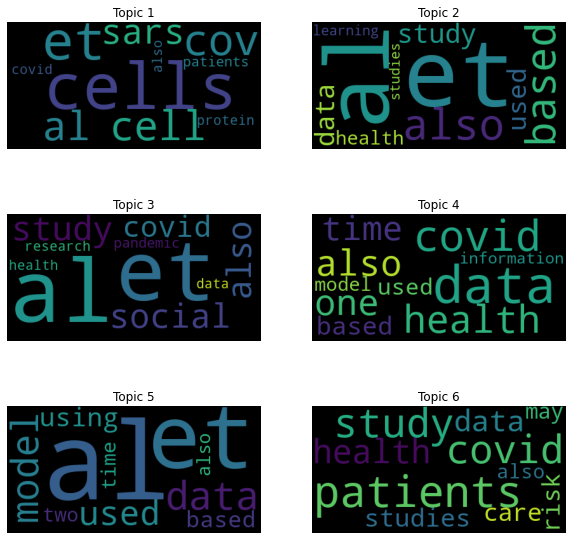

In [64]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()] 

cloud = WordCloud(stopwords=stop_words)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1))
    plt.gca().axis('off')

plt.show()

In [47]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 26.9 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=72a755e3ea2fa3687870866ee14486965303f8b82fa38c389601e706a1f2f413
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [54]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.010362  0.088352       1        1  27.202489
0      0.148023  0.004470       2        1  23.817177
2     -0.083575  0.017612       3        1  23.492432
4     -0.004841 -0.070217       4        1  14.318657
3     -0.047128 -0.028898       5        1   6.755213
1     -0.002116 -0.011319       6        1   4.414031, topic_info=          Term           Freq          Total Category  logprob  loglift
1027        et  244470.000000  244470.000000  Default  30.0000  30.0000
921         al  245869.000000  245869.000000  Default  29.0000  29.0000
37       cells   87873.000000   87873.000000  Default  28.0000  28.0000
212   patients  196969.000000  196969.000000  Default  27.0000  27.0000
114     health  144837.000000  144837.000000  Default  26.0000  26.0000
...        ...            ...            ...      ...      ...      ...
888      using    4511.809973  131657.863497   Topic6  -6.1120  -0.2531
565    however    3920.632029   89862.000830   Topic6  -6.2525  -0.0116
61       could    3516.098082   75363.050783   Topic6  -6.3614   0.0554
87         due    3360.351616   69174.303703   Topic6  -6.4067   0.0958
640      model    3398.674235  100034.658522   Topic6  -6.3953  -0.2617

[691 rows x 6 columns], token_table=        Topic      Freq     Term
term                            
373912      3  0.989571  abagisa
373912      5  0.008757  abagisa
33301       1  0.004487     aber
33301       2  0.004487     aber
33301       3  0.004487     aber
...       ...       ...      ...
26491       2  0.945409       κb
26491       3  0.018832       κb
26491       4  0.008252       κb
26491       5  0.002539       κb
26491       6  0.010157       κb

[2543 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 3, 5, 4, 2])